## Exploratory Data Analysis Part 1

#### Set imports for access to the Pandas, Matplotlib, and MySQL Connector Python libraries

In [72]:
import pandas as pd

In [73]:
import matplotlib.pyplot as plt

In [74]:
import mysql.connector as connection

#### Set up the proper imports to have access to the scikit-learn Python library


In [75]:
from sklearn.linear_model import LinearRegression

#### Use MySQL Connector to establish a connection to my remote data source


In [76]:
mydb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database="salesdb", user="root", password="D3v$tudent", use_pure="True")


#### Query the database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable

In [77]:
joinquery = """Select salesdb.sales.City_ID, salesdb.cities.City, salesdb.sales.Invoice_ID, salesdb.sales.Customer_Type, salesdb.sales.Product_Line, salesdb.sales.Unit_Price, salesdb.sales.Quantity, salesdb.sales.Total, salesdb.sales.Date, salesdb.sales.COGS, salesdb.sales.Rating
FROM salesdb.sales
INNER JOIN salesdb.cities
ON salesdb.sales.City_ID = salesdb.cities.City_ID;"""
joined_df = pd.read_sql(joinquery, mydb, index_col="Invoice_ID")
joined_df.head()


C:\Users\katri\AppData\Local\Temp\ipykernel_4120\1913456090.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  joined_df = pd.read_sql(joinquery, mydb, index_col="Invoice_ID")


,City_ID,City,Customer_Type,Product_Line,Unit_Price,Quantity,Total,Date,COGS,Rating
Invoice_ID,,,,,,,,,,
101-17-6199,1,Seattle,Normal,Food and beverages,45.79,7,336.5565,3/13/2019,320.53,7.0
101-81-4070,3,Milwaukee,Member,Health and beauty,62.82,2,131.9220,1/17/2019,125.64,4.9
102-06-2002,3,Milwaukee,Member,Sports and travel,25.25,5,132.5625,3/20/2019,126.25,6.1
102-77-2261,3,Milwaukee,Member,Health and beauty,65.31,7,480.0285,3/5/2019,457.17,4.2
105-10-6182,1,Seattle,Member,Fashion accessories,21.48,2,45.1080,2/27/2019,42.96,6.6


#### Perform the necessary data cleaning and wrangling steps for your DataFrame:


* Exploring the information of the joined DataFrame

After exploring the different columns in the joined DataFrame, I determined that I would like the Invoice_ID column to serve as my index column since it has unique identifiers for each row. I am seeing that the customer type has either a non-member or a member. There are different product lines, such as Food and beverages, Health and beauty, Sports and travel, Fashion accessories. I can already tell that I will want to change the way that is formatted! The sales tax column has "None" in it. The unit price * the quantity gives the total for the COGS column. The total column includes sales tax but need to figure out what percentage that is since there is no amount in the sales tax column, or can drop the sales tax column altogether. There are several methods of payment: Credit card, Ewallet and Cash. Gross Income for each Invoice, I am presuming. I am guessing the rating is the customer rating?? 

* Checking for and removing null values, if necessary

In [78]:
joined_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 101-17-6199 to 898-04-2717
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City_ID        1000 non-null   int64  
 1   City           1000 non-null   object 
 2   Customer_Type  1000 non-null   object 
 3   Product_Line   1000 non-null   object 
 4   Unit_Price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Total          1000 non-null   float64
 7   Date           1000 non-null   object 
 8   COGS           1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 85.9+ KB


* Checking for and removing duplicate rows, if necessary

In [79]:
joined_df.duplicated().sort_values()

Invoice_ID
101-17-6199    False
633-91-1052    False
634-97-8956    False
635-28-5728    False
635-40-6220    False
               ...  
373-73-7910    False
373-88-1424    False
374-17-3652    False
366-43-6862    False
898-04-2717    False
Length: 1000, dtype: bool

* Converting any necessary columns to Pandas DateTime format

In [80]:
joined_df["Date"] = pd.to_datetime(joined_df["Date"])
joined_df.info()

joined_df["Product_Line"] = joined_df["Product_Line"].str.title()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 101-17-6199 to 898-04-2717
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   City_ID        1000 non-null   int64         
 1   City           1000 non-null   object        
 2   Customer_Type  1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_Price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Total          1000 non-null   float64       
 7   Date           1000 non-null   datetime64[ns]
 8   COGS           1000 non-null   float64       
 9   Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 85.9+ KB


#### Explore the DataFrame to examine the spread of values across categories. Utilize this exploration to answer the following questions:



##### How many sales were made for members vs. normal customers?
     * There were 501 sales made for members and 499 made for normal customers. 

In [81]:
joined_df["Customer_Type"].value_counts()

Member    501
Normal    499
Name: Customer_Type, dtype: int64

##### How many sales were made at each store location?
    * There were 340 sales made in Seattle
    * There were 332 sales made in New York City
    * There were 328 sales made in Milwaukee

In [82]:
joined_df["City"].value_counts()

Seattle          340
New York City    332
Milwaukee        328
Name: City, dtype: int64

##### How many sales were made for each product line?
    * Fashion accessories       178
    * Food and beverages        174
    * Electronic accessories    170
    * Sports and travel         166
    * Home and lifestyle        160
    * Health and beauty         152

In [83]:
joined_df["Product_Line"].value_counts()

Fashion Accessories       178
Food And Beverages        174
Electronic Accessories    170
Sports And Travel         166
Home And Lifestyle        160
Health And Beauty         152
Name: Product_Line, dtype: int64

##### What is the overall average rating, based on all sales records?
    * The overall average rating was 6.9727

In [84]:
joined_df["Rating"].mean()

6.9727

#### Create three visualizations of the DataFrame to better understand any trends or patterns within the data set.  Can use a type of chart of my choosing, and can select which variables to analyze.  All three charts should contain the following:
* A chart title
* X-axis labels, if applicable
* Y-axis labels, if applicable


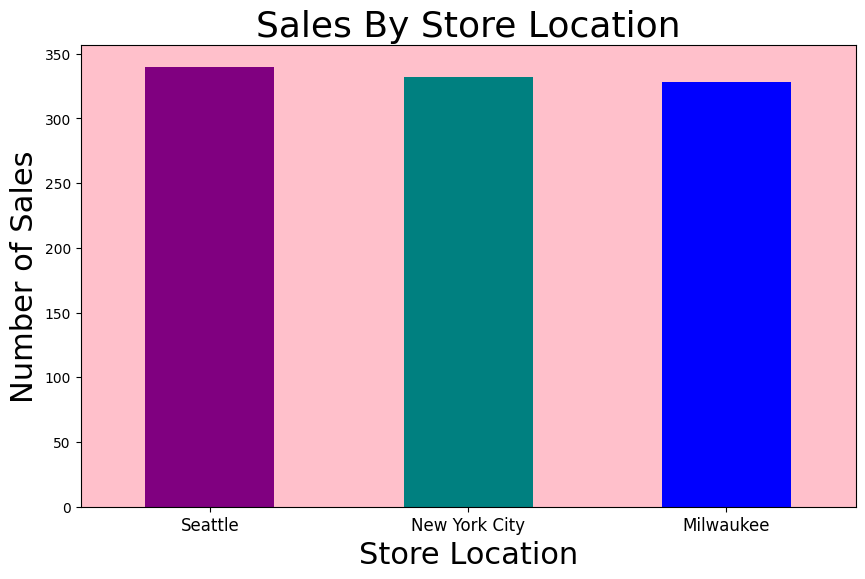

In [85]:
sales_per_location = joined_df["City"].value_counts()
my_bar_plot = sales_per_location.plot.bar(figsize=(10,6), color=["purple","teal", "blue"])
plt.title("Sales By Store Location", fontsize=26)
plt.xlabel("Store Location", fontsize=22)
plt.ylabel("Number of Sales", fontsize=22)
plt.xticks(rotation="horizontal", fontsize=12)
my_bar_plot.set_facecolor("pink");

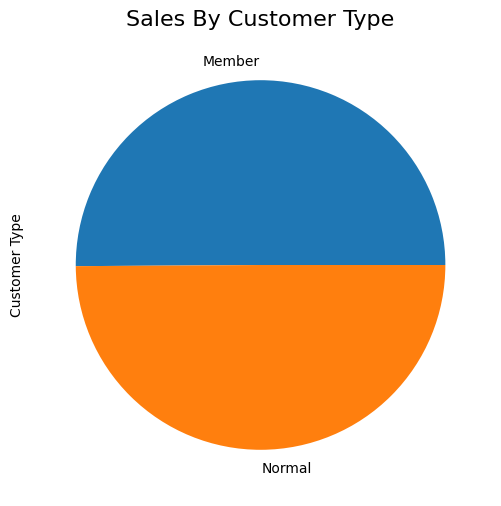

In [86]:
member_vs_customer = joined_df["Customer_Type"].value_counts()
my_pie_plot = member_vs_customer.plot.pie(figsize=(10,6))
plt.title("Sales By Customer Type", fontsize=16)
plt.ylabel("Customer Type");


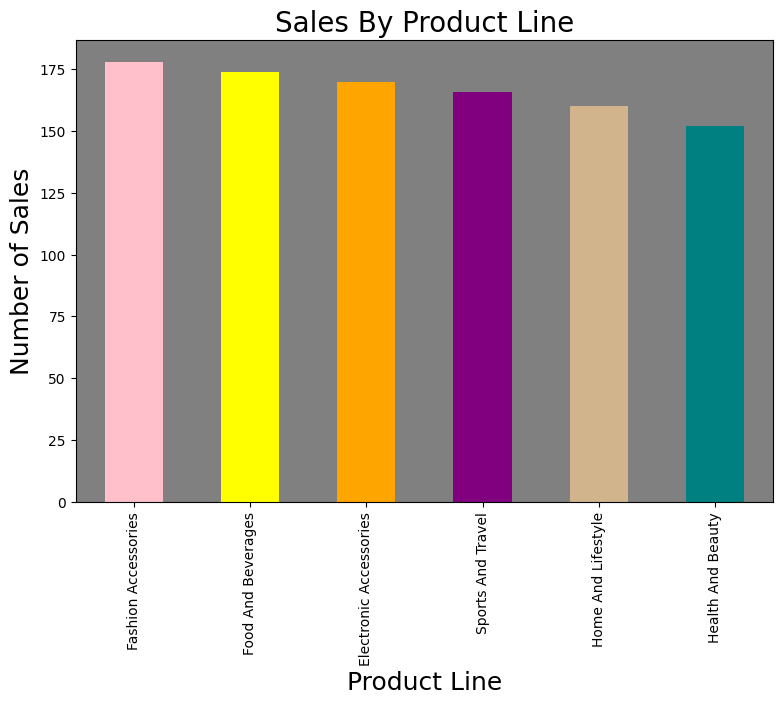

In [87]:
sales_by_product_line = joined_df["Product_Line"].value_counts()
my_plot = sales_by_product_line.plot.bar(figsize=(9,6), color=["pink", "yellow", "orange", "purple", "tan", "teal"])
plt.title("Sales By Product Line", fontsize=20)
plt.xlabel("Product Line", fontsize=18)
plt.ylabel("Number of Sales", fontsize=18)
my_plot.set_facecolor("gray")

## Exploratory Data Analysis Part 2

In [88]:
joined_df.head()

,City_ID,City,Customer_Type,Product_Line,Unit_Price,Quantity,Total,Date,COGS,Rating
Invoice_ID,,,,,,,,,,
101-17-6199,1,Seattle,Normal,Food And Beverages,45.79,7,336.5565,2019-03-13,320.53,7.0
101-81-4070,3,Milwaukee,Member,Health And Beauty,62.82,2,131.9220,2019-01-17,125.64,4.9
102-06-2002,3,Milwaukee,Member,Sports And Travel,25.25,5,132.5625,2019-03-20,126.25,6.1
102-77-2261,3,Milwaukee,Member,Health And Beauty,65.31,7,480.0285,2019-03-05,457.17,4.2
105-10-6182,1,Seattle,Member,Fashion Accessories,21.48,2,45.1080,2019-02-27,42.96,6.6


#### Describe numeric trends in the DataFrame, using the appropriate Pandas function

In [89]:
joined_df.describe()

,City_ID,Unit_Price,Quantity,Total,COGS,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,1.988000,55.672130,5.510000,322.966749,307.58738,6.97270
std,0.817633,26.494628,2.923431,245.885335,234.17651,1.71858
min,1.000000,10.080000,1.000000,10.678500,10.17000,4.00000
25%,1.000000,32.875000,3.000000,124.422375,118.49750,5.50000
50%,2.000000,55.230000,5.000000,253.848000,241.76000,7.00000
75%,3.000000,77.935000,8.000000,471.350250,448.90500,8.50000
max,3.000000,99.960000,10.000000,1042.650000,993.00000,10.00000


#### Explore the correlation between columns of the data set, using the appropriate Pandas function

In [90]:
joined_df.corr()

C:\Users\katri\AppData\Local\Temp\ipykernel_4120\828153247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  joined_df.corr()


,City_ID,Unit_Price,Quantity,Total,COGS,Rating
City_ID,1.000000,0.028202,0.015964,0.041047,0.041047,0.010238
Unit_Price,0.028202,1.000000,0.010778,0.633962,0.633962,-0.008778
Quantity,0.015964,0.010778,1.000000,0.705510,0.705510,-0.015815
Total,0.041047,0.633962,0.705510,1.000000,1.000000,-0.036442
COGS,0.041047,0.633962,0.705510,1.000000,1.000000,-0.036442
Rating,0.010238,-0.008778,-0.015815,-0.036442,-0.036442,1.000000


#### Reshape two columns to prepare for fitting to a linear regression model, and save each as its own unique variable

In [91]:
reshaped_x = joined_df[["Quantity"]]
reshaped_y = joined_df["COGS"]


#### Create a new LinearRegression instance, and use the appropriate function to create a predictive model for my Y-axis values.


In [92]:
model = LinearRegression()

model.fit(reshaped_x, reshaped_y)

predicteded_y_values = model.predict(reshaped_x)

#### Create a visualization of a predictive model, and ensure it includes the following stylizations:
* A chart title
* X-axis label
* Y-axis label
* A different color line for my predictive model


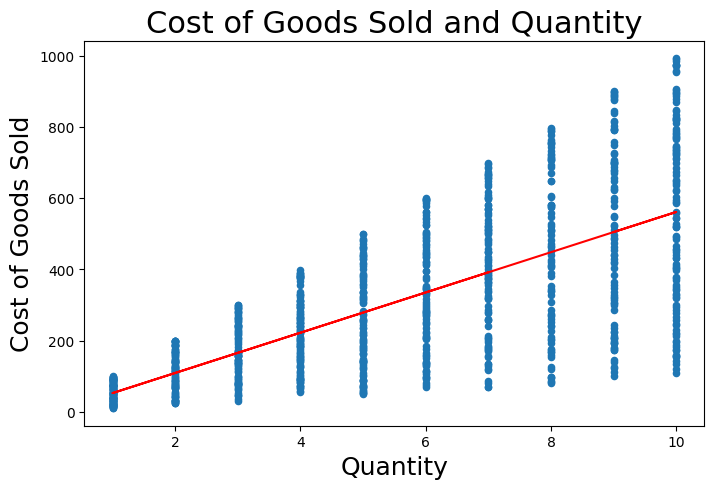

In [93]:
joined_df.plot.scatter(x="Quantity", y="COGS", figsize=(8,5))
plt.title("Cost of Goods Sold and Quantity", fontsize=22)
plt.xlabel("Quantity", fontsize=18)
plt.ylabel("Cost of Goods Sold", fontsize=18)
plt.plot(reshaped_x, predicteded_y_values, color="Red");